In [14]:
import matplotlib.pyplot
import numpy as np

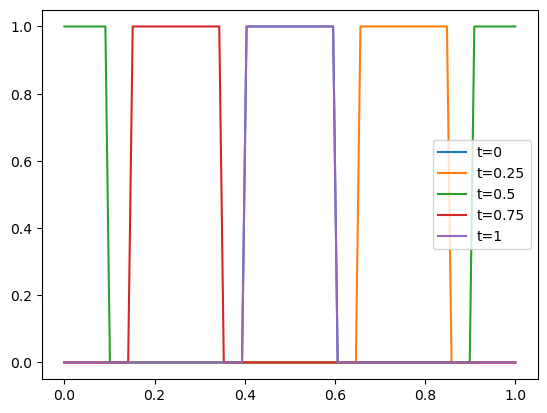

In [15]:
u=lambda x,t: np.piecewise((x-t) % 1,[(x-t) % 1<0.4,(x-t) % 1>0.6,((x-t) % 1>=0.4)&((x-t) % 1<=0.6)],[0,0,1])

x=np.linspace(0,1,100)
matplotlib.pyplot.plot(x,u(x,0),x,u(x,0.25),x,u(x,0.5),x,u(x,0.75),x,u(x,1))
matplotlib.pyplot.legend(['t=0','t=0.25','t=0.5','t=0.75','t=1'])
matplotlib.pyplot.show()

In [39]:
T=3.5
h=0.05
J=int(1/h)
r=0.2
dt=r*h
N=round(T/dt)
x=np.arange(0,1,h)  # which means [0,1) with step h

In [40]:
# FTBS
v_ftbs=np.zeros((J,N))
v_ftbs[:,0]=u(x,0)
for n in range(1,N):
    for j in range(J):
        v_ftbs[j,n]=v_ftbs[j,n-1]-r*(v_ftbs[j,n-1]-v_ftbs[(j-1)%J,n-1])

In [41]:
# FTCS
v=np.zeros((J,N))
v[:,0]=u(x,0)
for n in range(1,N):
    for j in range(1,J-1):
        v[j,n]=v[j,n-1]-r/2*(v[j+1,n-1]-v[j-1,n-1])
    v[0,n]=v[0,n-1]-r/2*(v[1,n-1]-v[J-1,n-1])
    v[J-1,n]=v[J-1,n-1]-r/2*(v[0,n-1]-v[J-2,n-1])

In [42]:
# Lax-Wendroff
v_lw=np.zeros((J,N))
v_lw[:,0]=u(x,0)
for n in range(1,N):
    for j in range(1,J-1):
        v_lw[j,n]=v_lw[j,n-1]+r/2*(v_lw[j+1,n-1]-v_lw[j-1,n-1])+r**2/2*(v_lw[j+1,n-1]-2*v_lw[j,n-1]+v_lw[j-1,n-1])
    v_lw[0,n]=v_lw[0,n-1]+r/2*(v_lw[1,n-1]-v_lw[J-1,n-1])+r**2/2*(v_lw[1,n-1]-2*v_lw[0,n-1]+v_lw[J-1,n-1])
    v_lw[J-1,n]=v_lw[J-1,n-1]+r/2*(v_lw[0,n-1]-v_lw[J-2,n-1])+r**2/2*(v_lw[0,n-1]-2*v_lw[J-1,n-1]+v_lw[J-2,n-1])

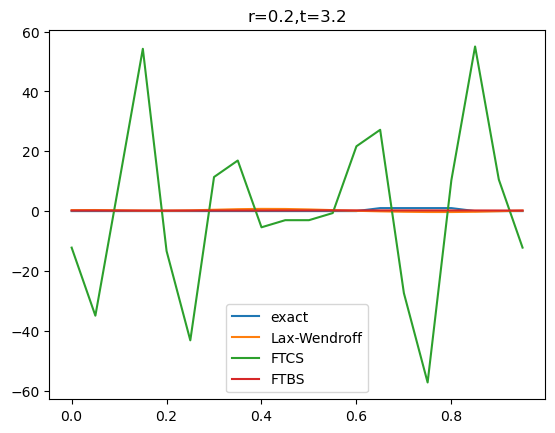

In [47]:
t=3.2
matplotlib.pyplot.plot(x,u(x,t),x,v_lw[:,round(t/dt)],x,v[:,round(t/dt)],x,v_ftbs[:,round(t/dt)])
matplotlib.pyplot.legend(['exact','Lax-Wendroff','FTCS','FTBS'])
matplotlib.pyplot.title(f'r={r},t={t}')
matplotlib.pyplot.show()

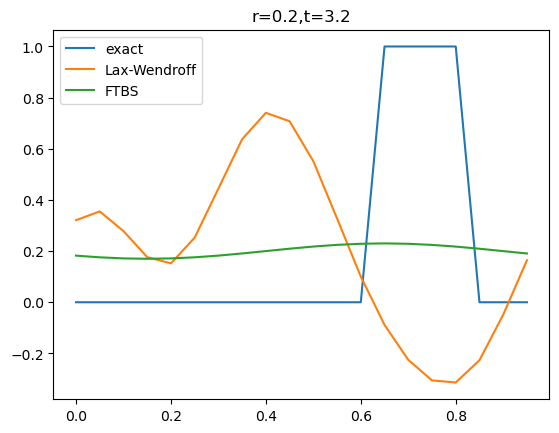

In [48]:
t=3.2
matplotlib.pyplot.plot(x,u(x,t),x,v_lw[:,round(t/dt)],x,v_ftbs[:,round(t/dt)])
matplotlib.pyplot.legend(['exact','Lax-Wendroff','FTBS'])
matplotlib.pyplot.title(f'r={r},t={t}')
matplotlib.pyplot.show()